In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
%matplotlib inline

In [ ]:
file_path = '/content/drive/My Drive/SocialMediaProductivity/social_media_vs_productivity.csv'
df = pd.read_csv(file_path)
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [ ]:
# shape and basic info
print("Shape of data:", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

Shape of data: (30000, 19)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12

In [ ]:
# keep only rows where both social media time and productivity score are present
df_clean = df.dropna(subset=["daily_social_media_time", "actual_productivity_score"])

print("Shape after cleaning:", df_clean.shape)

Shape after cleaning: (25095, 19)


In [ ]:
cols = ["daily_social_media_time", "actual_productivity_score", "number_of_notifications"]
print(df_clean[cols].describe())

       daily_social_media_time  actual_productivity_score  \
count             25095.000000               25095.000000   
mean                  3.113776                   4.948311   
std                   2.076122                   1.883779   
min                   0.000000                   0.296812   
25%                   1.633166                   3.369790   
50%                   3.028026                   4.947065   
75%                   4.375371                   6.525091   
max                  17.973256                   9.846258   

       number_of_notifications  
count             25095.000000  
mean                 59.961825  
std                   7.722857  
min                  30.000000  
25%                  55.000000  
50%                  60.000000  
75%                  65.000000  
max                  90.000000  


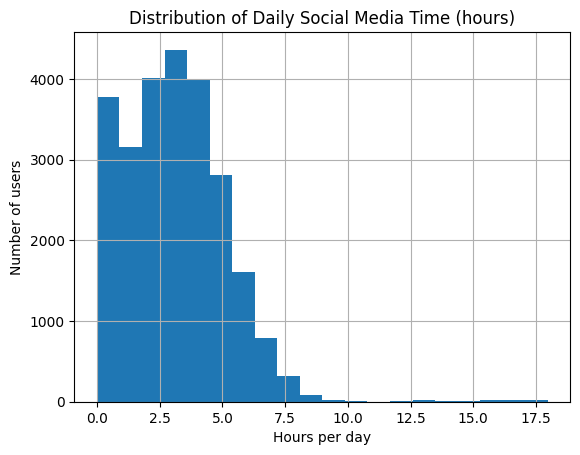

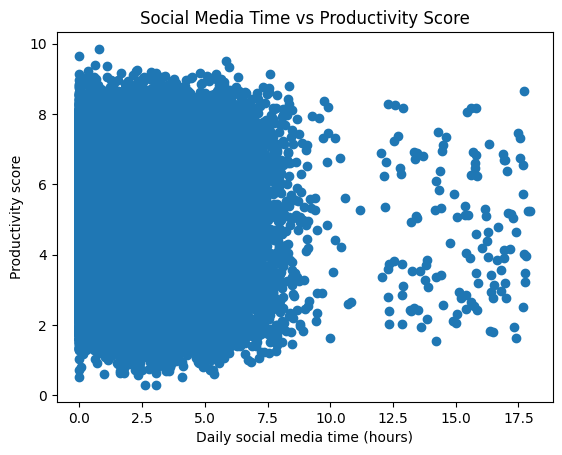

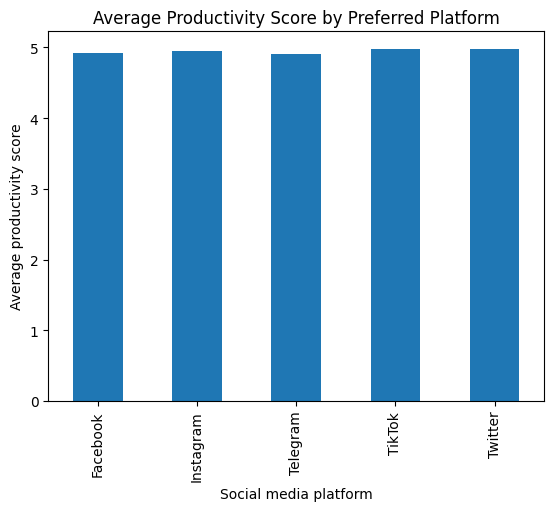

In [ ]:
import matplotlib.pyplot as plt

# 1. Histogram of daily social media time
plt.figure()
df_clean["daily_social_media_time"].hist(bins=20)
plt.title("Distribution of Daily Social Media Time (hours)")
plt.xlabel("Hours per day")
plt.ylabel("Number of users")
plt.show()

# 2. Scatter plot: social media time vs productivity
plt.figure()
plt.scatter(df_clean["daily_social_media_time"], df_clean["actual_productivity_score"])
plt.title("Social Media Time vs Productivity Score")
plt.xlabel("Daily social media time (hours)")
plt.ylabel("Productivity score")
plt.show()

# 3. Bar chart: average productivity by platform
plt.figure()
platform_productivity = df_clean.groupby("social_platform_preference")["actual_productivity_score"].mean()
platform_productivity.plot(kind="bar")
plt.title("Average Productivity Score by Preferred Platform")
plt.xlabel("Social media platform")
plt.ylabel("Average productivity score")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# feature (X) and target (y)
X = df_clean[["daily_social_media_time"]]   # independent variable
y = df_clean["actual_productivity_score"]          # dependent variable

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² score:", r2)
print("Model coefficient (slope):", model.coef_[0])
print("Model intercept:", model.intercept_)

Mean Absolute Error: 1.6210819171076123
R² score: 0.00018154683132765026
Model coefficient (slope): -0.004513027569645499
Model intercept: 4.958025602988008


In [ ]:
avg_social_time = df_clean["daily_social_media_time"].mean()
avg_productivity = df_clean["actual_productivity_score"].mean()

print(f"Total records used: {len(df_clean)}")
print(f"Average daily social media time: {avg_social_time:.2f} hours")
print(f"Average productivity score: {avg_productivity:.2f}")
print(f"Model MAE: {mae:.2f}")
print(f"Model R²: {r2:.2f}")

Total records used: 25095
Average daily social media time: 3.11 hours
Average productivity score: 4.95
Model MAE: 1.62
Model R²: 0.00
